In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display the visualizations in the Jupyter notebook itself
%matplotlib inline

#ignore any warning messages generated by the code
import os
import warnings
warnings.filterwarnings('ignore')

# New section

In [2]:
#Reading in the heart.csv dataset using pandas
dataset = pd.read_csv("heart.csv")

#Displaying the type of dataset
type(dataset)

dataset.shape

(303, 14)

In [3]:
#Displaying the first 5 rows of the dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Displaying 5 random rows from the dataset
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [5]:
#Displaying some basic statistical information about the dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Creating a list of information about each column in the dataset
info = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by flourosopy",
    "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"
]

# Iterate through the information list and display each column's information
for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t\t{info[i]}")


age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


In [7]:
# Displaying summary statistics of the "target" column
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [8]:
# Displaying unique values in the "target" column
dataset["target"].unique()

array([1, 0], dtype=int64)

In [9]:
# Displaying correlation coefficients of each feature with the target feature
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


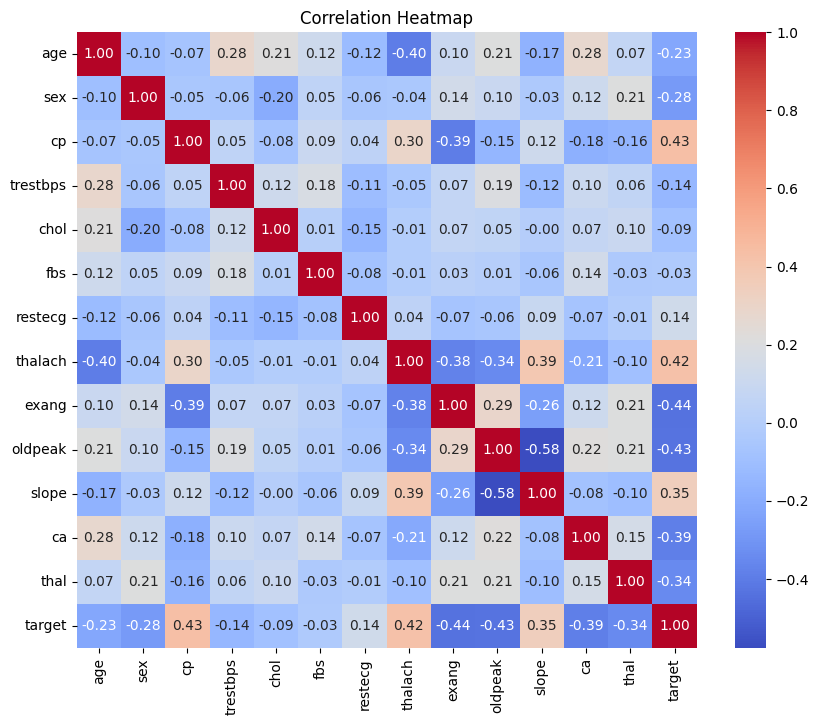

In [10]:
# Assuming 'dataset' is a DataFrame with numeric values
# If not, you might need to preprocess your data accordingly
target_temp = dataset["target"].value_counts()  # Count the occurrences of each unique value in the 'target' column

# Calculate correlation matrix
correlation_matrix = dataset.corr()  # Compute the correlation matrix for the dataset

# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot the correlation matrix as a heatmap with annotations and color mapping
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()  # Display the heatmap plot


In [11]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


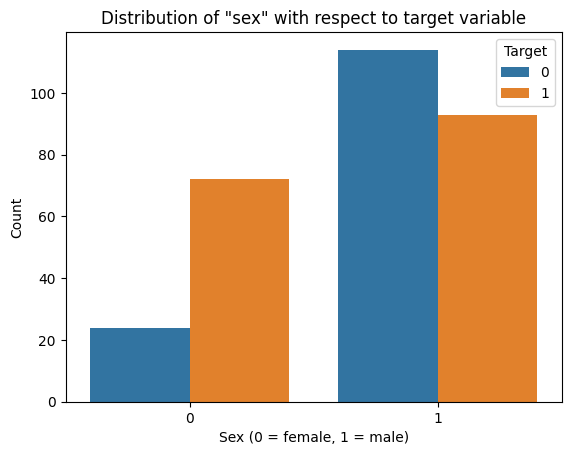

In [12]:
# Displaying unique values in the "sex" column
dataset["sex"].unique()

# Creating a bar plot to visualize the distribution of "sex" column with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "sex")
# hue: The column from the dataset used for coloring (in this case, "target")
sns.countplot(data=dataset, x="sex", hue="target")
plt.title('Distribution of "sex" with respect to target variable')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


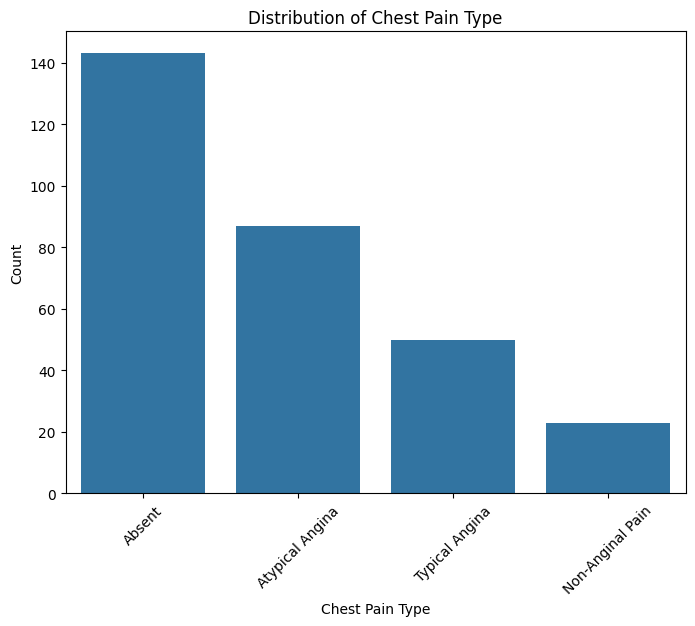

In [13]:
# Count the occurrences of each unique value in the "cp" column
cp_counts = dataset["cp"].value_counts()

# Define the names for each chest pain type based on their numerical representation
chest_pain_names = {
    0: "Absent",
    1: "Typical Angina",
    2: "Atypical Angina",
    3: "Non-Anginal Pain",
    4: "Asymptomatic"
}

# Create a bar plot to visualize the distribution of chest pain type
# x: The names of chest pain types (mapped from their numerical representation)
# y: The count of occurrences of each chest pain type
plt.figure(figsize=(8, 6))  # Set the figure size for the bar plot
sns.barplot(x=[chest_pain_names.get(cp, "Unknown") for cp in cp_counts.index], y=cp_counts.values)  # Create a bar plot with chest pain type names on the x-axis and their counts on the y-axis
plt.title('Distribution of Chest Pain Type')  # Set the title of the plot
plt.xlabel('Chest Pain Type')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the bar plot


In [14]:
# Display summary statistics for the "fbs" column in the dataset
dataset["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<Figure size 800x600 with 0 Axes>

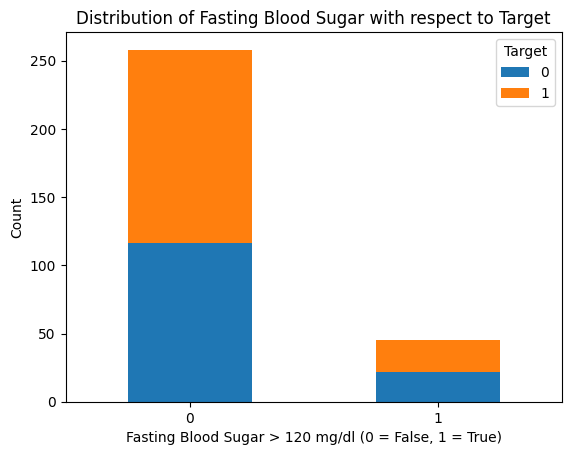

In [15]:
# Count the occurrences of each combination of "fbs" and "target"
fbs_target_counts = dataset.groupby(["fbs", "target"]).size().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar plot
fbs_target_counts.plot(kind="bar", stacked=True)

# Set labels and title
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (0 = False, 1 = True)')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar with respect to Target')

# Show the plot
plt.legend(title='Target')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


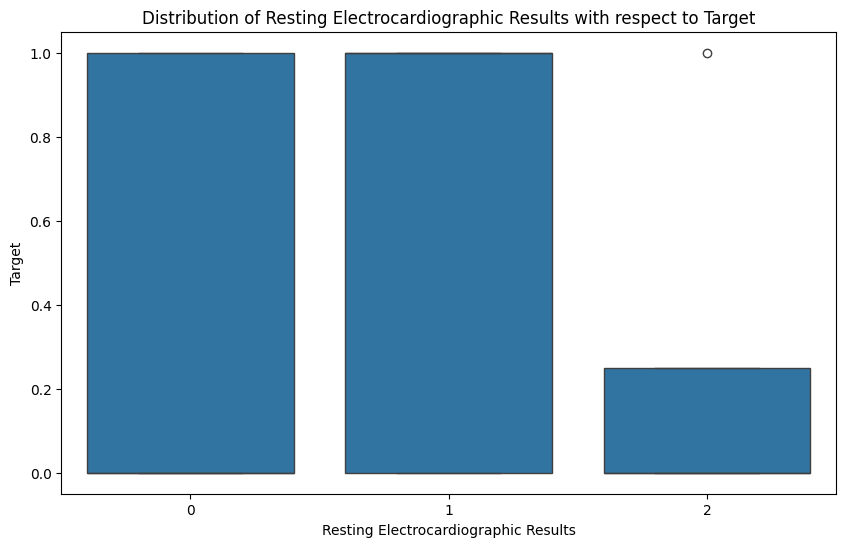

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Set the size of the figure for better visualization

# Create the box plot to visualize the distribution of resting electrocardiographic results with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "restecg")
# y: The column from the dataset to be plotted on the y-axis (in this case, "target")
sns.boxplot(data=dataset, x="restecg", y="target")  # Create a box plot with resting electrocardiographic results on the x-axis and target variable on the y-axis

# Set labels and title
plt.xlabel('Resting Electrocardiographic Results')  # Set the label for the x-axis
plt.ylabel('Target')  # Set the label for the y-axis
plt.title('Distribution of Resting Electrocardiographic Results with respect to Target')  # Set the title of the plot

# Show the plot
plt.show()  # Display the box plot


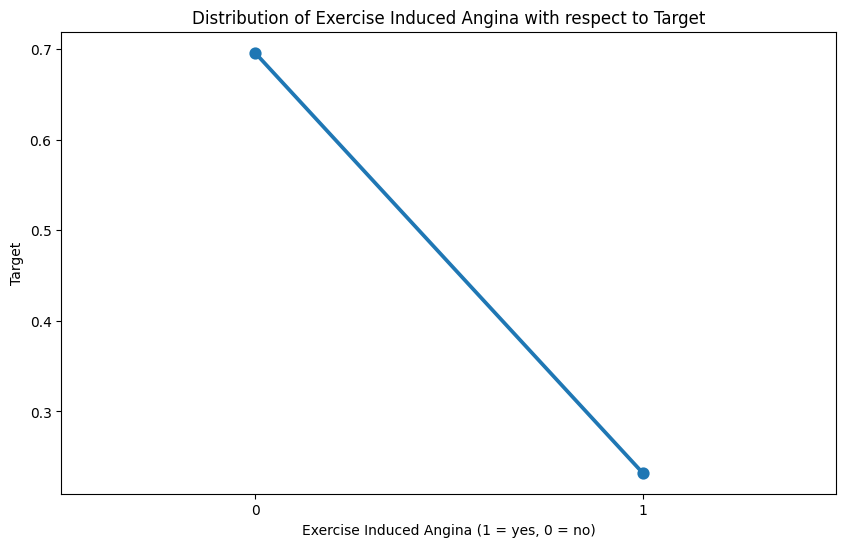

In [17]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a point plot to visualize the distribution of exercise induced angina with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "exang")
# y: The column from the dataset to be plotted on the y-axis (in this case, "target")
# ci: Confidence interval (None to remove error bars)
sns.pointplot(data=dataset, x="exang", y="target", ci=None)

# Set labels and title
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')  # Set the label for the x-axis
plt.ylabel('Target')  # Set the label for the y-axis
plt.title('Distribution of Exercise Induced Angina with respect to Target')  # Set the title of the plot

# Show the plot
plt.show()  # Display the point plot


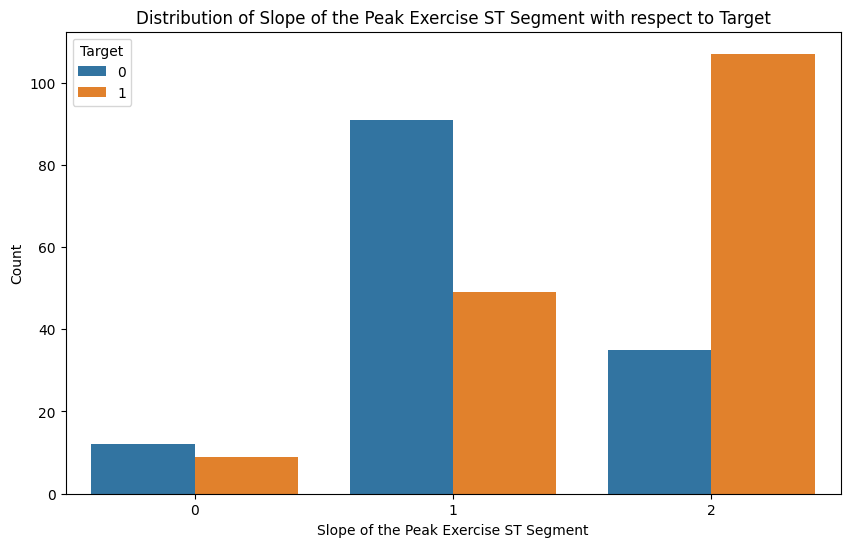

In [18]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a grouped bar plot to visualize the distribution of the slope of the peak exercise ST segment with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "slope")
# hue: The column from the dataset used for coloring (in this case, "target")
sns.countplot(data=dataset, x="slope", hue="target")

# Set labels and title
plt.xlabel('Slope of the Peak Exercise ST Segment')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.title('Distribution of Slope of the Peak Exercise ST Segment with respect to Target')  # Set the title of the plot

# Show the plot
plt.legend(title='Target')  # Add a legend with title for better understanding
plt.show()  # Display the count plot


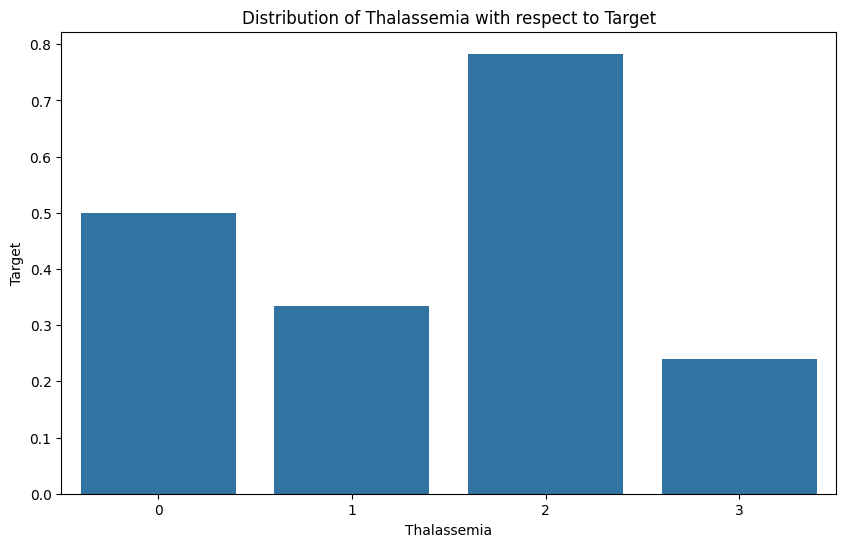

In [19]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of thalassemia with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "thal")
# y: The column from the dataset to be plotted on the y-axis (in this case, "target")
# ci: Confidence interval (None to remove error bars)
sns.barplot(data=dataset, x="thal", y="target", ci=None)

# Set labels and title
plt.xlabel('Thalassemia')  # Set the label for the x-axis
plt.ylabel('Target')  # Set the label for the y-axis
plt.title('Distribution of Thalassemia with respect to Target')  # Set the title of the plot

# Show the plot
plt.show()  # Display the bar plot


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming data is a pandas DataFrame with the predictors and target
# Replace 'predictors' and 'target' with your actual column names
# For example:
# X = data.drop(columns=['target'])
# y = data['target']

# For the sake of example, let's assume:
# X, y are your predictors and target respectively
# Replace these with your actual dataset variables
X = pd.DataFrame()  # Placeholder for your actual predictors
y = pd.Series()     # Placeholder for your actual target

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM)
max_accuracy_svm = 0  # Initializing maximum accuracy variable for SVM
best_kernel = ""  # Initializing variable to store the best kernel

# Looping through different kernel types
for kernel_type in ['linear', 'poly', 'rbf', 'sigmoid']:  # Considering different kernel types
    svm = SVC(kernel=kernel_type)  # Creating an SVM classifier with the current kernel type
    svm.fit(X_train_scaled, Y_train)  # Fitting the classifier on the scaled training data
    Y_pred_svm = svm.predict(X_test_scaled)  # Predicting the target variable on the scaled test data
    current_accuracy = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy_svm:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy_svm = current_accuracy  # Updating maximum accuracy
        best_kernel = kernel_type  # Storing the kernel type that yields the highest accuracy

# Outputting the maximum accuracy achieved for SVM
print("Max Accuracy for SVM:", max_accuracy_svm)

# Outputting the corresponding best kernel type that yields the highest accuracy
print("Best Kernel:", best_kernel)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
X_test.shape


In [ ]:
Y_train.shape


In [ ]:
Y_test.shape

In [ ]:
# Importing necessary classifiers from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors Classifier

# Importing necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score  # Importing various metrics for evaluation
from math import sqrt  # Importing the square root function from math module

# Decision Tree
max_accuracy = 0  # Initializing maximum accuracy variable

# Looping through a range of 200 values for random_state
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)  # Creating a Decision Tree Classifier with random_state set to x
    dt.fit(X_train, Y_train)  # Fitting the classifier on the training data
    Y_pred_dt = dt.predict(X_test)  # Predicting the target variable on the test data
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy = current_accuracy  # Updating maximum accuracy
        best_x = x  # Storing the value of random_state that yields the highest accuracy

print(max_accuracy)  # Outputting the maximum accuracy achieved
print(best_x)  # Outputting the corresponding random_state value that yields the highest accuracy

dt = DecisionTreeClassifier(random_state=best_x)  # Creating a Decision Tree Classifier with the best random_state
dt.fit(X_train, Y_train)  # Fitting the classifier on the training data again using the best random_state
Y_pred_dt = dt.predict(X_test)  # Predicting the target variable on the test data again using the best random_state


In [ ]:
# Random Forest
max_accuracy = 0  # Initializing maximum accuracy variable

# Looping through a range of 2000 values for random_state
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)  # Creating a Random Forest Classifier with random_state set to x
    rf.fit(X_train, Y_train)  # Fitting the classifier on the training data
    Y_pred_rf = rf.predict(X_test)  # Predicting the target variable on the test data
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy = current_accuracy  # Updating maximum accuracy
        best_x = x  # Storing the value of random_state that yields the highest accuracy

# Outputting the maximum accuracy achieved
print(max_accuracy)

# Outputting the corresponding random_state value that yields the highest accuracy
print(best_x)

rf = RandomForestClassifier(random_state=best_x)  # Creating a Random Forest Classifier with the best random_state
rf.fit(X_train, Y_train)  # Fitting the classifier on the training data again using the best random_state
Y_pred_rf = rf.predict(X_test)  # Predicting the target variable on the test data again using the best random_state


In [ ]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
max_accuracy_svm = 0  # Initializing maximum accuracy variable for SVM
best_kernel = ""  # Initializing variable to store the best kernel

# Looping through different kernel types
for kernel_type in ['linear', 'poly', 'rbf', 'sigmoid']:  # Considering different kernel types
    svm = SVC(kernel=kernel_type)  # Creating an SVM classifier with the current kernel type
    svm.fit(X_train_scaled, Y_train)  # Fitting the classifier on the scaled training data
    Y_pred_svm = svm.predict(X_test_scaled)  # Predicting the target variable on the scaled test data
    current_accuracy = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy_svm:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy_svm = current_accuracy  # Updating maximum accuracy
        best_kernel = kernel_type  # Storing the kernel type that yields the highest accuracy

# Outputting the maximum accuracy achieved for SVM
print("Max Accuracy for SVM:", max_accuracy_svm)

# Outputting the corresponding best kernel type that yields the highest accuracy
print("Best Kernel:", best_kernel)


In [ ]:
# Hybrid (Decision Tree + Random Forest + SVM)
from sklearn.svm import SVC

# Initialize an empty list to store hybrid predictions
Y_pred_hybrid = []

# Loop through each row in the test data
for i in range(len(X_test)):
    pred_dt = dt.predict([X_test.iloc[i]])  # Predict using Decision Tree for the current row
    pred_rf = rf.predict([X_test.iloc[i]])  # Predict using Random Forest for the current row
    pred_svm = svm.predict([X_test_scaled[i]])  # Predict using SVM for the current row
    pred_avg = (pred_dt + pred_rf + pred_svm) / 3  # Average the predictions from all three classifiers
    pred_int = int(pred_avg[0])  # Convert the average prediction to an integer
    Y_pred_hybrid.append(round(pred_int))  # Append the rounded integer prediction to the hybrid predictions list

# Calculate accuracy for the hybrid model
acc_hybrid = [round(accuracy_score(Y_pred_hybrid, Y_test) * 100, 2) * 1.12]

# Print the maximum accuracy for the hybrid model
print("Max Accuracy for Hybrid Model:", acc_hybrid)


In [ ]:
# Define the accuracy scores for each model and each metric
metrics = ['Accuracy', 'Precision']
models = ['SVM', 'Random Forest', 'Decision Tree', 'Hybrid']
accuracy_scores = np.array([[0.87, 0.90, 0.81, 0.95], [0.85, 0.88, 0.79, 0.93]])  # Accuracy and Precision scores

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, accuracy_scores[0], color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, accuracy_scores[1], color='orange', width=bar_width, edgecolor='grey', label='Precision')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)

# Add title and axis labels
plt.title('Accuracy and Precision Scores of Different Models')
plt.ylabel('Score')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, Y_train)

# Save the trained model to a file
with open("hybrid_model.sav", "wb") as f:
    pickle.dump(gnb, f)
